## Import Libraries

In [9]:
!pip install tensorflow pandas scikit-learn

In [10]:
import pandas as pd
import numpy as np
import sklearn
import tensorflow as tf

## Read CSV

In [11]:
pf=pd.read_csv("/content/sample_data/Mobile_Price_Classification-220531-204702 (1).csv")
pf.head(5)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,0
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,0
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


# Split the data in to independent & dependent variable

In [12]:
x = pf.drop('price_range', axis=1)
y = pf['price_range']

# Train & Test the data

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.25)

# Normalize the Data

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Build the ANN Model

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [16]:
model=Sequential([Dense(8,input_dim=X_train.shape[1],activation='relu'),
                  Dense(4,activation='relu'),
                  Dense(1,activation='sigmoid')
                  ])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Compile and Train the Model

In [17]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [18]:
history=model.fit(X_train,Y_train,
                  epochs=100,
                  batch_size=32,
                  validation_data=(X_test,Y_test))

Epoch 1/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5132 - loss: 0.7487 - val_accuracy: 0.5440 - val_loss: 0.7180
Epoch 2/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5166 - loss: 0.7037 - val_accuracy: 0.5780 - val_loss: 0.6904
Epoch 3/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5789 - loss: 0.6800 - val_accuracy: 0.5920 - val_loss: 0.6777
Epoch 4/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6064 - loss: 0.6684 - val_accuracy: 0.6020 - val_loss: 0.6705
Epoch 5/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6328 - loss: 0.6599 - val_accuracy: 0.6100 - val_loss: 0.6639
Epoch 6/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6340 - loss: 0.6566 - val_accuracy: 0.6100 - val_loss: 0.6588
Epoch 7/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6253 - loss: 0.6485 - val_accuracy: 0.6100 - val_loss: 0.6526
Epoch 8/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6478 - loss: 0.6487 - val_accuracy: 0.6220 - v

In [19]:
loss,accuracy=model.evaluate(X_test,Y_test)
print(f"Test Accuracy:{accuracy*100:2f}%")

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7070 - loss: 0.5177 
Test Accuracy:69.000000%


# Save

In [22]:
model.save('Mobile_Price_Weights2.h5')

# Graph

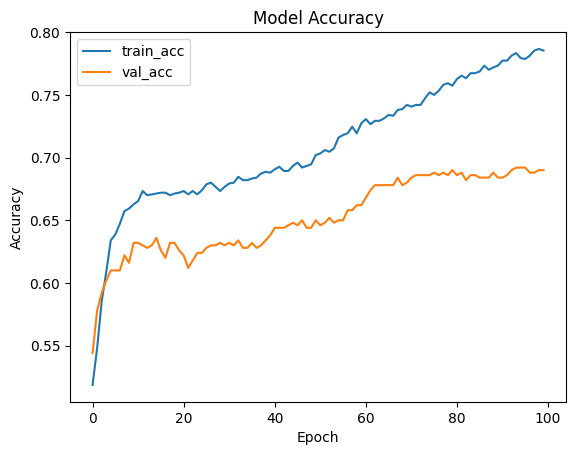

In [25]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
